In [1]:
from pymatgen import Structure
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.plotter import plot_brillouin_zone
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from matplotlib import pyplot as plt
import numpy as np
from scipy import constants as scc

# Télécharger la structure de bande

In [2]:
#Télécharger la structure de bande du matériau
with MPRester("CUtlIkfw4Pq2Hd7W") as m:
    structure = m.get_structure_by_material_id("mp-753774")
    structure.to(filename="KTmO2.cif")
    
    band_struc = m.get_bandstructure_by_material_id("mp-753774")
    band_struct_sl = m.get_bandstructure_by_material_id("mp-753774",line_mode= True)
    plotter = BSPlotter(band_struct_sl)
    data = plotter.bs_plot_data(zero_to_efermi=True, bs=None, bs_ref=None, split_branches=True)
    band_gap = band_struc.get_band_gap()
    cbm = band_struc.get_cbm() #minimum de bande de conduction
    vbm = band_struc.get_vbm() #maximum de la bande de valence
    
    #Donne l'index de la dernière bande de valence et de la première bande de conduction
    #print(vbm.get("band_index").get(list(vbm.get("band_index").keys())[0]))
    #print(cbm["band_index"].get(list(vbm.get("band_index").keys())[0]))
    
    print("Mon matériau est le KTmO2 \n")


Mon matériau est le KTmO2 



# Bande interdite

La bande interdite représente un gap d'énergie de  3.9715000000000003  eV. Elle est représentée sur le graphe entre les deux lignes rouges
La bande interdite est située entre les énergies  2.08977789 eV et  6.06127789 eV qui sont respectivement le maximum de la bande de valence et le minimum de la bande de conduction.
Ce gap est direct ce qui signifie que la différence entre les vecteurs d'onde de ces deux extremums est nulle.
Sur le graphe, la transition nécessaires pour amener un électron de la dernière bande de valence à la première bande de conduction est representée par la flèche noire.
Le matériel est donc un semi-conducteur à gap direct.


<Figure size 432x288 with 0 Axes>

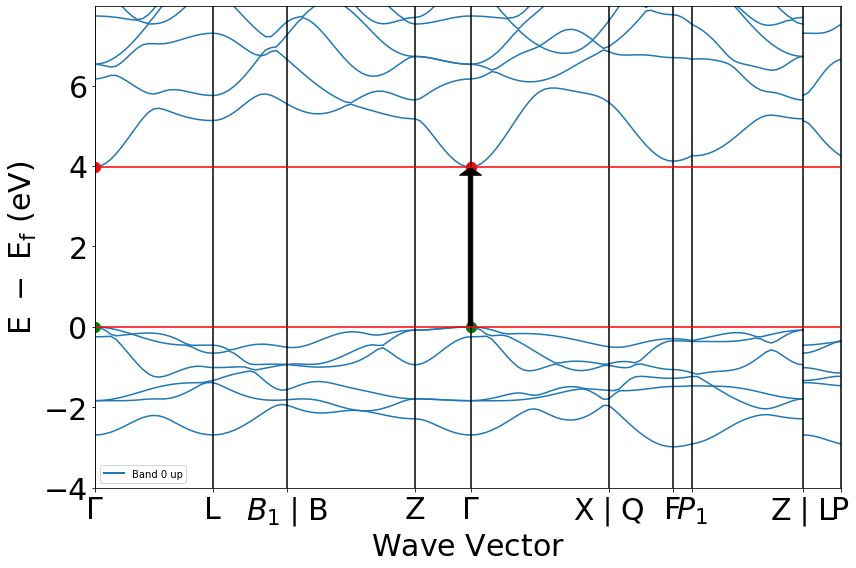

In [21]:
#Déterminer la bande interdite

print("La bande interdite représente un gap d'énergie de ",band_gap["energy"]," eV. Elle est représentée sur le graphe entre les deux lignes rouges")
print("La bande interdite est située entre les énergies ",band_struc.efermi + vbm['energy'],"eV et ",band_struc.efermi + cbm['energy'],"eV qui sont respectivement le maximum de la bande de valence et le minimum de la bande de conduction.")
print("Ce gap est direct ce qui signifie que la différence entre les vecteurs d'onde de ces deux extremums est nulle.")
print("Sur le graphe, la transition nécessaires pour amener un électron de la dernière bande de valence à la première bande de conduction est representée par la flèche noire.")
print("Le matériel est donc un semi-conducteur à gap direct.")

nb = len(data.get("distances"))
x1=[data.get("distances")[0][0],data.get("distances")[nb-1][-1]]
y1 = [data.get("energy").get("1")[4][14][0],data.get("energy").get("1")[4][14][0]]
y2 = [data.get("energy").get("1")[4][15][0],data.get("energy").get("1")[4][15][0]]

d15_4 = data["distances"][4]
plt.figure("0")
plotter.get_plot(vbm_cbm_marker=True)
plt.arrow(d15_4[0],data.get("energy").get("1")[4][14][0], 0.0 ,(cbm['energy']-vbm['energy']), ec = 'k', fc = 'k', width = 0.04, head_width = 0.2, head_length = 0.2, length_includes_head= True)
plt.plot(x1,y1,'r')
plt.plot(x1,y2,'r')
plt.show()
print()

# Dispersion

La mesure de dispersion est exprimée par la pente reliant les deux points des extrémités de chaque branche.

Pour la dernière bande de valence, la dispersion maximale vaut  0.42329679636521333 eV*Angstrom et la dispersion minimale vaut  0.07635757745262453  eV*Angstrom.
La disperion maximale(représentée en rouge) correspond à la branche 1, nommée Gamma-L, et la dispersion minimale(représentée en vert) correspond à la branche 2, nommée L-B_1.

Pour la première bande de conduction, la dispersion maximale vaut 2.56865210022144 en eV*Angstrom et la dispersion minimale vaut  0.3199503596381316  en eV*Angstrom
La disperion maximale(représentée en rouge) correspond à la branche 9, nommée Z-L, et la dispersion minimale(représentée en vert) correspond à la branche 3, nommée B-Z.


<Figure size 432x288 with 0 Axes>

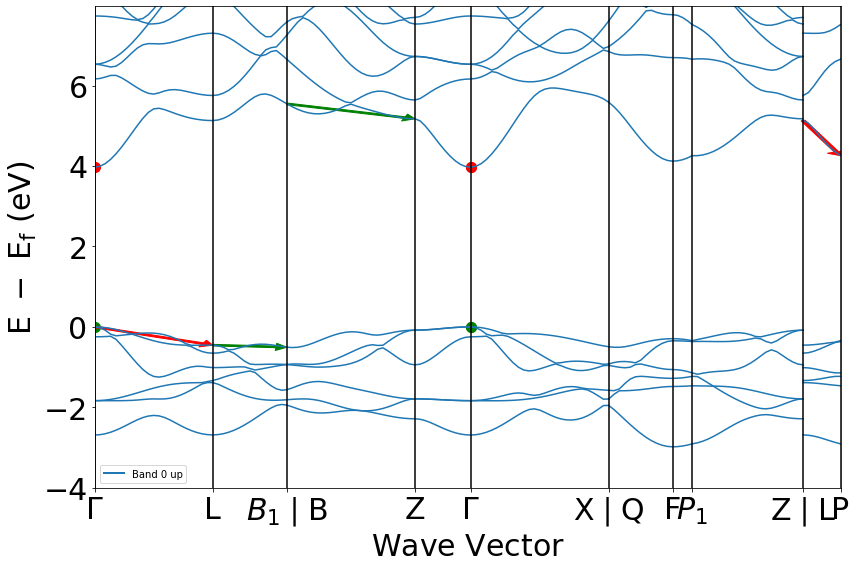

In [4]:
#Trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion.

print("La mesure de dispersion est exprimée par la pente reliant les deux points des extrémités de chaque branche.")

#Construire un vecteur qui contient les pentes pour chacune des branches des courbes qui nous intéressent 
nb_branches = len(data.get("energy").get('1'))

pente_14 = np.zeros(nb_branches)
pente_15 = np.zeros(nb_branches)    

for i in range(nb_branches) :
    di = data.get("distances")[i]
    energie_14 = data.get("energy").get('1')[i][14]
    energie_15 = data.get("energy").get('1')[i][15]
    dist = di[-1] - di[0]
    pente_14[i] = abs((energie_14[-1]-energie_14[0])/dist)
    pente_15[i] = abs((energie_15[-1]-energie_15[0])/dist)
    
max_pente_14 = max(pente_14)
max_pente_15 = max(pente_15)
min_pente_14 = min(pente_14)
min_pente_15 = min(pente_15)

print()
print("Pour la dernière bande de valence, la dispersion maximale vaut ",max_pente_14,"eV*Angstrom et la dispersion minimale vaut ",min_pente_14," eV*Angstrom.")
print("La disperion maximale(représentée en rouge) correspond à la branche 1, nommée Gamma-L, et la dispersion minimale(représentée en vert) correspond à la branche 2, nommée L-B_1.\n")
print("Pour la première bande de conduction, la dispersion maximale vaut",max_pente_15,"en eV*Angstrom et la dispersion minimale vaut ",min_pente_15," en eV*Angstrom")
print("La disperion maximale(représentée en rouge) correspond à la branche 9, nommée Z-L, et la dispersion minimale(représentée en vert) correspond à la branche 3, nommée B-Z.")
plt.figure("0")
plotter.get_plot(vbm_cbm_marker=True)

#Les points associés pour les flèches
#coordonnées max 14
x11 = data.get("distances")[0][0]
y11 = data.get("energy").get('1')[0][14][0]
x12 = data.get("distances")[0][-1]
y12 = data.get("energy").get('1')[0][14][-1]
#coordonnées min 14
x21 = data.get("distances")[1][0]
y21 = data.get("energy").get('1')[1][14][0]
x22 = data.get("distances")[1][-1]
y22 = data.get("energy").get('1')[1][14][-1]
#coordonnées max 15
x31 = data.get("distances")[8][0]
y31 = data.get("energy").get('1')[8][15][0]
x32 = data.get("distances")[8][-1]
y32 = data.get("energy").get('1')[8][15][-1]
#coordonnées max 15
x41 = data.get("distances")[2][0]
y41 = data.get("energy").get('1')[2][15][0]
x42 = data.get("distances")[2][-1]
y42 = data.get("energy").get('1')[2][15][-1]

plt.arrow(x11,y11,x12-x11,y12-y11, ec = 'r', fc = 'r', width = 0.04, head_width = 0.18, head_length = 0.1, length_includes_head= True)
plt.arrow(x21,y21,x22-x21,y22-y21, ec = 'g', fc = 'g', width = 0.04, head_width = 0.18, head_length = 0.1, length_includes_head= True)
plt.arrow(x31,y31,x32-x31,y32-y31, ec = 'r', fc = 'r', width = 0.04, head_width = 0.18, head_length = 0.1, length_includes_head= True)
plt.arrow(x41,y41,x42-x41,y42-y41, ec = 'g', fc = 'g', width = 0.04, head_width = 0.18, head_length = 0.1, length_includes_head= True)
plt.show()
print()



# Masse effective

La définition de la masse effective:
$\frac{1}{m*} = \frac{1}{\hbar^2}\frac{\partial^2 E}{\partial k^2}$

Pour estimer la masse effective en un point particulier du diagramme, nous utilisons l'approximation par un polynôme de degré deux.
Pour cela, il faut fiter les paramètres a,b et c tels que : E = y = ax^2 + bx + c, à l'aide des deux points adjacents aux points qui nous intéressent.
La définition de la masse effective est notée ci-dessus.
Ici,(d^2 E)/(dk^2) = 2a

La masse effective à la base de la première bande de conduction vaut 5.794190050944305e-33 kg
La masse effective au sommet de la dernière bande de valence vaut -2.369460969263698e-32 kg

On peut comparer ces masses à la masse de l'électron dans le vide
Pour le minimum de la bande de conduction : m*/m_el =  0.00636095076401834
Pour le maximum de la bande de valence : m*/m_el =  -0.026012306172617173 



<Figure size 432x288 with 0 Axes>

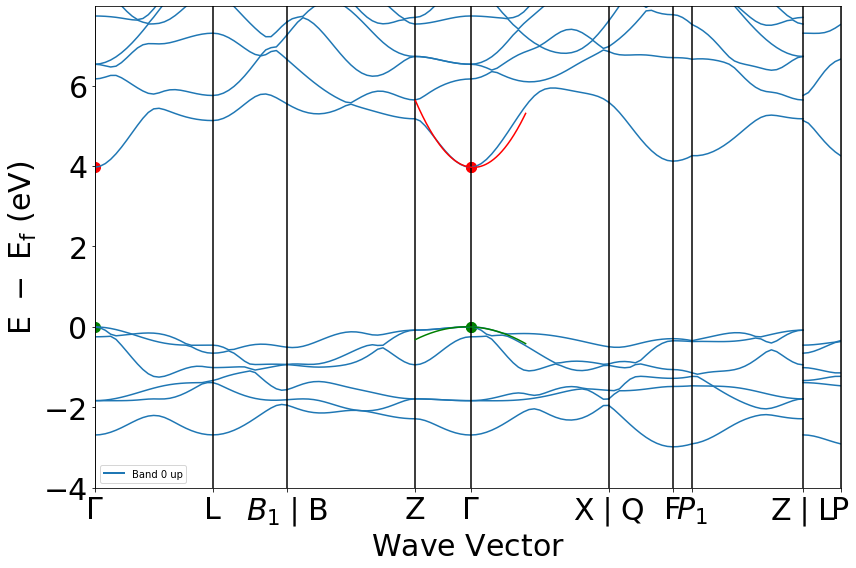

In [5]:
#Calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.

b14_4 = data.get("energy").get("1")[4][14]
b15_4 = data.get("energy").get("1")[4][15]
d14_4 = data["distances"][4]
d15_4 = data["distances"][4]

#On récupère les points (x,y) des maxs et mins
CBMp = [d15_4[0],b15_4[0]]
VBMp = [d14_4[0],b14_4[0]]

#On prend un point à gauche et un point à droite pour fiter les paramètres de la paraboles
b14_3 = data.get("energy").get("1")[3][14]
b15_3 = data.get("energy").get("1")[3][15]
d14_3 = data["distances"][3]
d15_3 = data["distances"][3]

#On choisit arbitrairement un point de chaque côté
Gp14 = [d14_3[-4],b14_3[-4]]
Dp14 = [d14_4[4],b14_4[4]]
Gp15 = [d15_3[-4],b15_3[-4]]
Dp15 = [d15_3[4],b15_3[4]]

#Fit du minimum de la bande de conduction
x15 = [Gp15[0],CBMp[0],Dp15[0]]
y15 = [Gp15[1],CBMp[1],Dp15[1]]
result15 = np.polyfit(x15,y15,2)
xfit15 = np.linspace(CBMp[0]-0.5,CBMp[0]+0.5,1000)
yfit15 = result15[0]*xfit15**2 + result15[1]*xfit15 + result15[2]

#Fit du maximum de la bande de valence
x14 = [Gp14[0],VBMp[0],Dp14[0]]
y14 = [Gp14[1],VBMp[1],Dp14[1]]
result14 = np.polyfit(x14,y14,2)
xfit14 = np.linspace(VBMp[0]-0.5,VBMp[0]+0.5,1000)
yfit14 = result14[0]*xfit14**2 + result14[1]*xfit14 + result14[2]

print("Pour estimer la masse effective en un point particulier du diagramme, nous utilisons l'approximation par un polynôme de degré deux.")
print("Pour cela, il faut fiter les paramètres a,b et c tels que : E = y = ax^2 + bx + c, à l'aide des deux points adjacents aux points qui nous intéressent.")
print("La définition de la masse effective est notée ci-dessus.")
print("Ici,(d^2 E)/(dk^2) = 2a\n")
dd2epsi_15 = 2.0*result15[0]
dd2epsi_14 = 2.0*result14[0]
hbar = scc.hbar
eV = 1.60218e-19
angstrom = 10e-10
sq_angstrom = angstrom**2 
m_el = 9.109e-31
m15 = ((1/hbar)**2*dd2epsi_15*eV*sq_angstrom)**-1
m14 = ((1/hbar)**2*dd2epsi_14*eV*sq_angstrom)**-1
print("La masse effective à la base de la première bande de conduction vaut",m15,"kg")
print("La masse effective au sommet de la dernière bande de valence vaut",m14,"kg\n")
print("On peut comparer ces masses à la masse de l'électron dans le vide")
print("Pour le minimum de la bande de conduction : m*/m_el = ",m15/m_el)
print("Pour le maximum de la bande de valence : m*/m_el = ",m14/m_el,"\n")

plt.figure("1")
plotter.get_plot(vbm_cbm_marker=True)
plt.plot(xfit15,yfit15,'r')
plt.plot(xfit14,yfit14,'g')
plt.show()